# Data Transformation

Data transformation is the process of converting data from one format to another, typically from the format of a source system into the required format of a destination system. in this process data is transformed by performing operations of data cleaning, normalization, and construction of new attributes. In this case, data is in several csv files, to which a transformation of the data will be made and stored in another CSV file. 

## Introduction


All processes of data transformation were made in this Notebook. This also includes the processes of creating/deleting new attributes, performing numerical transformations for non-numerical features of the datasets and handling corrupted values (NaN, inf, etc.). 

Also, some of the given datasets had corrupted values in numerical attributes. The problem was that numerical features had non-sense string values in some rows. This was solved by the creation of a custom python script that removes those unvalid rows, which can be found under the */Scripts* directory. This script was not included in this notebook because of the required computational load to perform the operation, so those scripts were runned in the background in parallel:

```console
$ nohup python3 clean_dataset1.py > dataset1.out &
$ nohup python3 clean_dataset2.py > dataset2.out &
$ nohup python3 clean_dataset3.py > dataset3.out &
$ nohup python3 clean_dataset4.py > dataset4.out &
```

In [1]:
# Needed libraries
import gc
import pandas as pd
from os import getcwd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

pd.set_option("display.max_columns", 80)

In [2]:
df_from_each_file = []
# This will help pandas identify N/a values
na_val = ['N/a', 'na', 'Na', 'NA', 'NAN', 'Nan', 'NaN', np.nan]
cols = [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min', ' Label']

for file in glob(getcwd() + "/*.csv"):
    print(f'Appending {file}')
    read_df = pd.read_csv(file, sep=',', low_memory=False, na_values=na_val)
    read_df = read_df[cols]
    if 'Unnamed: 0' in list(read_df.columns):
        read_df.drop(['Unnamed: 0'], axis=1, inplace=True)
    df_from_each_file.append(read_df)

df = pd.concat(df_from_each_file, ignore_index=True)
del(read_df, df_from_each_file)

Appending /home/jovyan/CIC-IDS-2017/Tuesday-WorkingHours.pcap_ISCX.csv
Appending /home/jovyan/CIC-IDS-2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Appending /home/jovyan/CIC-IDS-2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Appending /home/jovyan/CIC-IDS-2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Appending /home/jovyan/CIC-IDS-2017/Friday-WorkingHours-Morning.pcap_ISCX.csv
Appending /home/jovyan/CIC-IDS-2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Appending /home/jovyan/CIC-IDS-2017/Monday-WorkingHours.pcap_ISCX.csv
Appending /home/jovyan/CIC-IDS-2017/Wednesday-workingHours.pcap_ISCX.csv


Dataset labels:


BENIGN                      2158487
DoS Hulk                     231073
PortScan                     158930
DDoS                         128027
DoS GoldenEye                 10293
FTP-Patator                    7938
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1966
Web Attack � Brute Force       1239
Infiltration                     36
Heartbleed                       11
Name:  Label, dtype: int64

Number of labels: 14.


<AxesSubplot:>

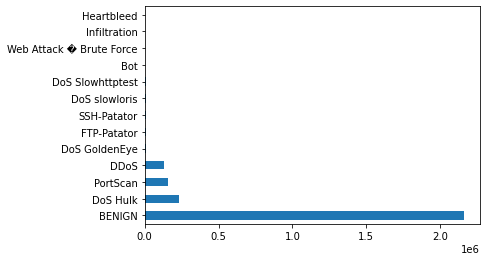

In [3]:
print(f'Dataset labels:')
display(df[' Label'].value_counts())
number_of_labels = len(df[' Label'].unique())
print(f'Number of labels: {number_of_labels}.')
df[' Label'].value_counts().plot(kind='barh')

In [4]:
# características constantes
drop_cols = []
for col in df.columns:
    if len(df[col].unique())==1:
        drop_cols.append(col)
print(drop_cols)
df.drop(drop_cols, axis=1, inplace=True)
df

[' Bwd PSH Flags', ' Bwd URG Flags']


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,179,0,89.5,103.345698,1.246875e+06,17187.500000,64.000000,135.557286,445,1,640,106.666667,194.325157,497,1,538,179.333333,303.686242,530,4,0,0,164,104,10937.500000,6250.000000,0,220,66.500000,99.001837,9801.363636,0,0,0,1,0,0,0,0,0,72.545455,62.857143,89.5,164,0.0,0.0,0.0,0.0,0.0,0.0,7.0,440.0,4.0,358.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,1472,0,736.0,849.859596,3.937778e+06,14444.444440,75.000000,192.795228,684,1,900,112.500000,252.411229,734,1,766,255.333333,435.323252,758,3,0,0,204,104,10000.000000,4444.444444,0,1472,253.142857,527.434262,278186.901100,0,0,0,1,0,0,0,0,0,272.615385,66.666667,736.0,204,0.0,0.0,0.0,0.0,0.0,0.0,9.0,600.0,4.0,2944.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,1415,0,707.5,816.950631,4.652282e+06,9128.630705,120.500000,236.433336,777,1,1205,200.833333,397.058392,1008,1,927,309.000000,491.647231,876,1,0,0,164,104,5809.128631,3319.502075,0,1415,467.166667,690.098917,476236.515200,0,0,0,1,0,0,0,0,0,509.636364,396.571429,707.5,164,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2776.0,4.0,2830.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,185,0,92.5,106.809800,1.608611e+06,21526.418790,51.100000,90.767652,299,1,511,85.166667,131.900594,349,1,462,154.000000,224.719826,412,1,0,0,164,104,13698.630140,7827.788650,0,226,68.500000,101.933579,10390.454550,0,0,0,1,0,0,0,0,0,74.727273,64.571429,92.5,164,0.0,0.0,0.0,0.0,0.0,0.0,7.0,452.0,4.0,370.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,1472,0,736.0,849.859596,4.600259e+06,16817.593790,64.416667,148.698266,531,1,773,96.625000,196.665733,580,1,675,225.000000,348.901132,627,1,0,0,204,104,11642.949550,5174.644243,0,1472,254.000000,527.520762,278278.153800,0,0,0,1,0,0,0,0,0,273.538461,68.000000,736.0,204,0.0,0.0,0.0,0.0,0.0,0.0,9.0,612.0,4.0,2944.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715188,53,32215,4,2,112,152,28,28,28.000000,0.000000,76,76,76.0,0.000000,8.194940e+03,186.248642,6443.000000,13617.579480,30780,3,30832,10277.333330,17755.843810,30780,4,3,3.000000,0.000000,3,3,0,0,80,64,124.165761,62.082881,28,76,41.714286,23.421602,548.571429,0,0,0,0,0,0,0,0,0,48.666667,

In [5]:
missed_val = df.isnull().sum()
missed_val_rate = 100 * df.isnull().sum() / len(df)
table = pd.concat([missed_val, missed_val_rate], axis=1)

table = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
table = table[table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

display(table)

del(missed_val, missed_val_rate, table)

,Missing Values,% of Total Values
Flow Bytes/s,1344,0.0
Fwd Avg Bytes/Bulk,1,0.0
Idle Min,1,0.0
Idle Max,1,0.0
Idle Std,1,0.0
Idle Mean,1,0.0
Active Min,1,0.0
Active Max,1,0.0
Active Std,1,0.0
Active Mean,1,0.0


DoS Hulk    949
BENIGN      395
Name:  Label, dtype: int64


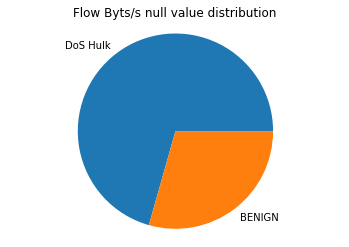

In [6]:
null_df = df[df['Flow Bytes/s'].isna()]
print(null_df[' Label'].value_counts())
null_df[' Label'].value_counts().plot(kind='pie')
plt.title('Flow Byts/s null value distribution')
plt.axis('equal')
plt.ylabel('')

del(null_df)

In [7]:
# Podemos dropear valores nulos con seguridad
df.dropna(0, inplace=True)
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,179,0,89.5,103.345698,1.246875e+06,17187.500000,64.000000,135.557286,445,1,640,106.666667,194.325157,497,1,538,179.333333,303.686242,530,4,0,0,164,104,10937.500000,6250.000000,0,220,66.500000,99.001837,9801.363636,0,0,0,1,0,0,0,0,0,72.545455,62.857143,89.5,164,0.0,0.0,0.0,0.0,0.0,0.0,7.0,440.0,4.0,358.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,1472,0,736.0,849.859596,3.937778e+06,14444.444440,75.000000,192.795228,684,1,900,112.500000,252.411229,734,1,766,255.333333,435.323252,758,3,0,0,204,104,10000.000000,4444.444444,0,1472,253.142857,527.434262,278186.901100,0,0,0,1,0,0,0,0,0,272.615385,66.666667,736.0,204,0.0,0.0,0.0,0.0,0.0,0.0,9.0,600.0,4.0,2944.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,1415,0,707.5,816.950631,4.652282e+06,9128.630705,120.500000,236.433336,777,1,1205,200.833333,397.058392,1008,1,927,309.000000,491.647231,876,1,0,0,164,104,5809.128631,3319.502075,0,1415,467.166667,690.098917,476236.515200,0,0,0,1,0,0,0,0,0,509.636364,396.571429,707.5,164,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2776.0,4.0,2830.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,185,0,92.5,106.809800,1.608611e+06,21526.418790,51.100000,90.767652,299,1,511,85.166667,131.900594,349,1,462,154.000000,224.719826,412,1,0,0,164,104,13698.630140,7827.788650,0,226,68.500000,101.933579,10390.454550,0,0,0,1,0,0,0,0,0,74.727273,64.571429,92.5,164,0.0,0.0,0.0,0.0,0.0,0.0,7.0,452.0,4.0,370.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,1472,0,736.0,849.859596,4.600259e+06,16817.593790,64.416667,148.698266,531,1,773,96.625000,196.665733,580,1,675,225.000000,348.901132,627,1,0,0,204,104,11642.949550,5174.644243,0,1472,254.000000,527.520762,278278.153800,0,0,0,1,0,0,0,0,0,273.538461,68.000000,736.0,204,0.0,0.0,0.0,0.0,0.0,0.0,9.0,612.0,4.0,2944.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715188,53,32215,4,2,112,152,28,28,28.000000,0.000000,76,76,76.0,0.000000,8.194940e+03,186.248642,6443.000000,13617.579480,30780,3,30832,10277.333330,17755.843810,30780,4,3,3.000000,0.000000,3,3,0,0,80,64,124.165761,62.082881,28,76,41.714286,23.421602,548.571429,0,0,0,0,0,0,0,0,0,48.666667,

In [8]:
with pd.option_context('mode.use_inf_as_na', True):
    missed_val = df.isnull().sum()
    missed_val_rate = 100 * df.isnull().sum() / len(df)
    table = pd.concat([missed_val, missed_val_rate], axis=1)

    table = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    table = table[table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

    display(table)
    del(missed_val, missed_val_rate, table)

,Missing Values,% of Total Values
Flow Bytes/s,1449,0.1
Flow Packets/s,1449,0.1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  if __name__ == '__main__':


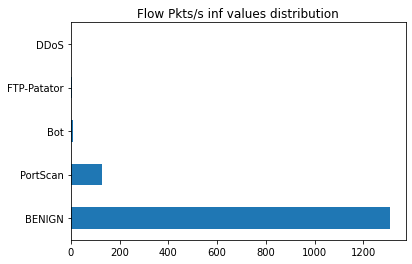

In [9]:
with pd.option_context('mode.use_inf_as_na', True):

    null_df = df[df[' Flow Packets/s'].isna()]
    null_df[' Label'].value_counts().plot(kind='barh')
    plt.title('Flow Pkts/s inf values distribution')
    del(null_df)
    
    # Podemos dropear valores infinitos con seguridad
    df.dropna(0, inplace=True)

In [10]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,179,0,89.5,103.345698,1.246875e+06,17187.500000,64.000000,135.557286,445,1,640,106.666667,194.325157,497,1,538,179.333333,303.686242,530,4,0,0,164,104,10937.500000,6250.000000,0,220,66.500000,99.001837,9801.363636,0,0,0,1,0,0,0,0,0,72.545455,62.857143,89.5,164,0.0,0.0,0.0,0.0,0.0,0.0,7.0,440.0,4.0,358.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,1472,0,736.0,849.859596,3.937778e+06,14444.444440,75.000000,192.795228,684,1,900,112.500000,252.411229,734,1,766,255.333333,435.323252,758,3,0,0,204,104,10000.000000,4444.444444,0,1472,253.142857,527.434262,278186.901100,0,0,0,1,0,0,0,0,0,272.615385,66.666667,736.0,204,0.0,0.0,0.0,0.0,0.0,0.0,9.0,600.0,4.0,2944.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,1415,0,707.5,816.950631,4.652282e+06,9128.630705,120.500000,236.433336,777,1,1205,200.833333,397.058392,1008,1,927,309.000000,491.647231,876,1,0,0,164,104,5809.128631,3319.502075,0,1415,467.166667,690.098917,476236.515200,0,0,0,1,0,0,0,0,0,509.636364,396.571429,707.5,164,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2776.0,4.0,2830.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,185,0,92.5,106.809800,1.608611e+06,21526.418790,51.100000,90.767652,299,1,511,85.166667,131.900594,349,1,462,154.000000,224.719826,412,1,0,0,164,104,13698.630140,7827.788650,0,226,68.500000,101.933579,10390.454550,0,0,0,1,0,0,0,0,0,74.727273,64.571429,92.5,164,0.0,0.0,0.0,0.0,0.0,0.0,7.0,452.0,4.0,370.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,1472,0,736.0,849.859596,4.600259e+06,16817.593790,64.416667,148.698266,531,1,773,96.625000,196.665733,580,1,675,225.000000,348.901132,627,1,0,0,204,104,11642.949550,5174.644243,0,1472,254.000000,527.520762,278278.153800,0,0,0,1,0,0,0,0,0,273.538461,68.000000,736.0,204,0.0,0.0,0.0,0.0,0.0,0.0,9.0,612.0,4.0,2944.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715188,53,32215,4,2,112,152,28,28,28.000000,0.000000,76,76,76.0,0.000000,8.194940e+03,186.248642,6443.000000,13617.579480,30780,3,30832,10277.333330,17755.843810,30780,4,3,3.000000,0.000000,3,3,0,0,80,64,124.165761,62.082881,28,76,41.714286,23.421602,548.571429,0,0,0,0,0,0,0,0,0,48.666667,

In [11]:
display(df[' Label'].value_counts())

BENIGN                      2156784
DoS Hulk                     230124
PortScan                     158804
DDoS                         128025
DoS GoldenEye                 10293
FTP-Patator                    7935
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1956
Web Attack � Brute Force       1239
Infiltration                     36
Heartbleed                       11
Name:  Label, dtype: int64

In [12]:
# Categorizamos los valores del protocolo
df['Protocol_6'] = np.ones(2712399)
df['Protocol_17'] = np.zeros(2712399)
df.insert(len(df.columns)-1, ' Label', df.pop(' Label'))
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_6,Protocol_17,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,179,0,89.5,103.345698,1.246875e+06,17187.500000,64.000000,135.557286,445,1,640,106.666667,194.325157,497,1,538,179.333333,303.686242,530,4,0,0,164,104,10937.500000,6250.000000,0,220,66.500000,99.001837,9801.363636,0,0,0,1,0,0,0,0,0,72.545455,62.857143,89.5,164,0.0,0.0,0.0,0.0,0.0,0.0,7.0,440.0,4.0,358.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,1472,0,736.0,849.859596,3.937778e+06,14444.444440,75.000000,192.795228,684,1,900,112.500000,252.411229,734,1,766,255.333333,435.323252,758,3,0,0,204,104,10000.000000,4444.444444,0,1472,253.142857,527.434262,278186.901100,0,0,0,1,0,0,0,0,0,272.615385,66.666667,736.0,204,0.0,0.0,0.0,0.0,0.0,0.0,9.0,600.0,4.0,2944.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,1415,0,707.5,816.950631,4.652282e+06,9128.630705,120.500000,236.433336,777,1,1205,200.833333,397.058392,1008,1,927,309.000000,491.647231,876,1,0,0,164,104,5809.128631,3319.502075,0,1415,467.166667,690.098917,476236.515200,0,0,0,1,0,0,0,0,0,509.636364,396.571429,707.5,164,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2776.0,4.0,2830.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,185,0,92.5,106.809800,1.608611e+06,21526.418790,51.100000,90.767652,299,1,511,85.166667,131.900594,349,1,462,154.000000,224.719826,412,1,0,0,164,104,13698.630140,7827.788650,0,226,68.500000,101.933579,10390.454550,0,0,0,1,0,0,0,0,0,74.727273,64.571429,92.5,164,0.0,0.0,0.0,0.0,0.0,0.0,7.0,452.0,4.0,370.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,1472,0,736.0,849.859596,4.600259e+06,16817.593790,64.416667,148.698266,531,1,773,96.625000,196.665733,580,1,675,225.000000,348.901132,627,1,0,0,204,104,11642.949550,5174.644243,0,1472,254.000000,527.520762,278278.153800,0,0,0,1,0,0,0,0,0,273.538461,68.000000,736.0,204,0.0,0.0,0.0,0.0,0.0,0.0,9.0,612.0,4.0,2944.0,8192.0,2053.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715188,53,32215,4,2,112,152,28,28,28.000000,0.000000,76,76,76.0,0.000000,8.194940e+03,186.248642,6443.000000,13617.579480,30780,3,30832,10277.333330,17755.843810,30780,4,3,3.000000,0.000000,3,3,0,0,80,64,124.165761,62.0

In [13]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count', 

In [14]:
cols = [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd URG Flags', 'Fwd Packets/s', ' Bwd Packets/s', ' Packet Length Variance', 'FIN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' Down/Up Ratio', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Idle Min', 'Protocol_6', 'Protocol_17', ' Label']
df = df[cols]

In [15]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Packets/s,Bwd Packets/s,Packet Length Variance,FIN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Idle Min,Protocol_6,Protocol_17,Label
0,88,640,7,4,440,220,0,62.857143,179,0,89.5,64.000000,135.557286,445,538,179.333333,303.686242,530,4,0,0,10937.500000,6250.000000,9801.363636,0,0,1,0,0,0,8192.0,2053.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN
1,88,900,9,4,600,300,0,66.666667,1472,0,736.0,75.000000,192.795228,684,766,255.333333,435.323252,758,3,0,0,10000.000000,4444.444444,278186.901100,0,0,1,0,0,0,8192.0,2053.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN
2,88,1205,7,4,2776,1388,0,396.571429,1415,0,707.5,120.500000,236.433336,777,927,309.000000,491.647231,876,1,0,0,5809.128631,3319.502075,476236.515200,0,0,1,0,0,0,8192.0,2053.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN
3,88,511,7,4,452,226,0,64.571429,185,0,92.5,51.100000,90.767652,299,462,154.000000,224.719826,412,1,0,0,13698.630140,7827.788650,10390.454550,0,0,1,0,0,0,8192.0,2053.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN
4,88,773,9,4,612,306,0,68.000000,1472,0,736.0,64.416667,148.698266,531,675,225.000000,348.901132,627,1,0,0,11642.949550,5174.644243,278278.153800,0,0,1,0,0,0,8192.0,2053.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715188,53,32215,4,2,112,28,28,28.000000,76,76,76.0,6443.000000,13617.579480,30780,3,3.000000,0.000000,3,3,0,0,124.165761,62.082881,548.571429,0,0,0,0,0,0,-1.0,-1.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN
2715189,53,324,2,2,84,42,42,42.000000,181,181,181.0,108.000000,183.597386,320,2,2.000000,0.000000,2,2,0,0,6172.839506,6172.839506,5796.300000,0,0,0,0,0,1,-1.0,-1.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN
2715190,58030,82,2,1,31,31,0,15.500000,6,6,6.0,41.000000,52.325902,78,0,0.000000,0.000000,0,0,1,0,24390.243900,12195.121950,267.333333,0,0,0,1,0,0,1006.0,0.0,32.0,0.0,0.0,0.0,1.0,0.0,BENIGN
2715191,53,1048635,6,2,192,32,32,32.000000,128,128,128.0,149805.000000,375521.040500,1000947,3,3.000000,0.000000,3,3,0,0,5.721724,1.907241,1792.000000,0,0,0,0,0,0,-1.0,-1.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN


In [16]:
hours = np.full((len(df.index)), 8)
df.insert(1, 'xhr', np.sin(2*math.pi*hours/24))

In [17]:
df

,Destination Port,xhr,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Packets/s,Bwd Packets/s,Packet Length Variance,FIN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Idle Min,Protocol_6,Protocol_17,Label
0,88,0.866025,640,7,4,440,220,0,62.857143,179,0,89.5,64.000000,135.557286,445,538,179.333333,303.686242,530,4,0,0,10937.500000,6250.000000,9801.363636,0,0,1,0,0,0,8192.0,2053.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN
1,88,0.866025,900,9,4,600,300,0,66.666667,1472,0,736.0,75.000000,192.795228,684,766,255.333333,435.323252,758,3,0,0,10000.000000,4444.444444,278186.901100,0,0,1,0,0,0,8192.0,2053.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN
2,88,0.866025,1205,7,4,2776,1388,0,396.571429,1415,0,707.5,120.500000,236.433336,777,927,309.000000,491.647231,876,1,0,0,5809.128631,3319.502075,476236.515200,0,0,1,0,0,0,8192.0,2053.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN
3,88,0.866025,511,7,4,452,226,0,64.571429,185,0,92.5,51.100000,90.767652,299,462,154.000000,224.719826,412,1,0,0,13698.630140,7827.788650,10390.454550,0,0,1,0,0,0,8192.0,2053.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN
4,88,0.866025,773,9,4,612,306,0,68.000000,1472,0,736.0,64.416667,148.698266,531,675,225.000000,348.901132,627,1,0,0,11642.949550,5174.644243,278278.153800,0,0,1,0,0,0,8192.0,2053.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715188,53,0.866025,32215,4,2,112,28,28,28.000000,76,76,76.0,6443.000000,13617.579480,30780,3,3.000000,0.000000,3,3,0,0,124.165761,62.082881,548.571429,0,0,0,0,0,0,-1.0,-1.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN
2715189,53,0.866025,324,2,2,84,42,42,42.000000,181,181,181.0,108.000000,183.597386,320,2,2.000000,0.000000,2,2,0,0,6172.839506,6172.839506,5796.300000,0,0,0,0,0,1,-1.0,-1.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN
2715190,58030,0.866025,82,2,1,31,31,0,15.500000,6,6,6.0,41.000000,52.325902,78,0,0.000000,0.000000,0,0,1,0,24390.243900,12195.121950,267.333333,0,0,0,1,0,0,1006.0,0.0,32.0,0.0,0.0,0.0,1.0,0.0,BENIGN
2715191,53,0.866025,1048635,6,2,192,32,32,32.000000,128,128,128.0,149805.000000,375521.040500,1000947,3,3.000000,0.000000,3,3,0,0,5.721724,1.907241,1792.000000,0,0,0,0,0,0,-1.0,-1.0,20.0,0.0,0.0,0.0,1.0,0.0,BENIGN


In [18]:
df[' Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'PortScan',
       'Web Attack � Brute Force', 'Infiltration', 'Bot', 'DDoS',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [19]:
df.replace(to_replace="BENIGN", value=0, inplace=True)
df.replace(to_replace="DDoS", value=1, inplace=True)                       # DoS attack
df.replace(to_replace="DoS Hulk", value=1, inplace=True)                   # DoS attack
df.replace(to_replace="DoS GoldenEye", value=1, inplace=True)              # DoS attack
df.replace(to_replace="DoS slowloris", value=1, inplace=True)              # DoS attack
df.replace(to_replace="DoS Slowhttptest", value=1, inplace=True)           # DoS attack
df.replace(to_replace="DDoS", value=2, inplace=True)                       # DDoS+PortScan
df.replace(to_replace="PortScan", value=2, inplace=True)                   # DDoS+PortScan
df.replace(to_replace="Bot", value=3, inplace=True)                        # Botnet attack
df.replace(to_replace="FTP-Patator", value=4, inplace=True)                # Bruteforce attack
df.replace(to_replace="SSH-Patator", value=4, inplace=True)                # Bruteforce attack
df.replace(to_replace="Infiltration", value=5, inplace=True)               # Infiltration attack
df.replace(to_replace="Web Attack � Brute Force", value=6, inplace=True)   # Web attack
df.replace(to_replace="Heartbleed", value=6, inplace=True)                 # Web attack

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Dataset labels:


0    2156784
1     379737
2     158804
4      13832
3       1956
6       1250
5         36
Name:  Label, dtype: int64

Number of labels: 7.


<AxesSubplot:>

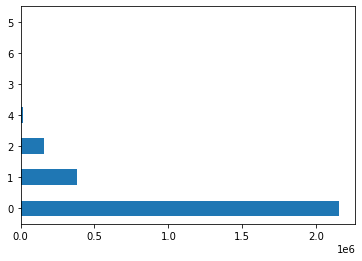

In [20]:
print(f'Dataset labels:')
display(df[' Label'].value_counts())
number_of_labels = len(df[' Label'].unique())
print(f'Number of labels: {number_of_labels}.')
df[' Label'].value_counts().plot(kind='barh')

In [23]:
cols = [' Destination Port', 'xhr', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Max', 'Fwd PSH Flags', 'Fwd Packets/s', ' Bwd Packets/s', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' min_seg_size_forward', ' Idle Min', 'Protocol_6', 'Protocol_17', ' Label']
df = df[cols]
df

,Destination Port,xhr,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Max,Fwd PSH Flags,Fwd Packets/s,Bwd Packets/s,RST Flag Count,PSH Flag Count,ACK Flag Count,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Idle Min,Protocol_6,Protocol_17,Label
0,88,0.866025,220,0,62.857143,0,89.5,538,179.333333,530,0,10937.500000,6250.000000,0,1,0,8192.0,2053.0,20.0,0.0,1.0,0.0,0
1,88,0.866025,300,0,66.666667,0,736.0,766,255.333333,758,0,10000.000000,4444.444444,0,1,0,8192.0,2053.0,20.0,0.0,1.0,0.0,0
2,88,0.866025,1388,0,396.571429,0,707.5,927,309.000000,876,0,5809.128631,3319.502075,0,1,0,8192.0,2053.0,20.0,0.0,1.0,0.0,0
3,88,0.866025,226,0,64.571429,0,92.5,462,154.000000,412,0,13698.630140,7827.788650,0,1,0,8192.0,2053.0,20.0,0.0,1.0,0.0,0
4,88,0.866025,306,0,68.000000,0,736.0,675,225.000000,627,0,11642.949550,5174.644243,0,1,0,8192.0,2053.0,20.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715188,53,0.866025,28,28,28.000000,76,76.0,3,3.000000,3,0,124.165761,62.082881,0,0,0,-1.0,-1.0,20.0,0.0,1.0,0.0,0
2715189,53,0.866025,42,42,42.000000,181,181.0,2,2.000000,2,0,6172.839506,6172.839506,0,0,0,-1.0,-1.0,20.0,0.0,1.0,0.0,0
2715190,58030,0.866025,31,0,15.500000,6,6.0,0,0.000000,0,1,24390.243900,12195.121950,0,0,1,1006.0,0.0,32.0,0.0,1.0,0.0,0
2715191,53,0.866025,32,32,32.000000,128,128.0,3,3.000000,3,0,5.721724,1.907241,0,0,0,-1.0,-1.0,20.0,0.0,1.0,0.0,0


In [25]:
from sklearn.ensemble import IsolationForest

num_cols = df.columns[:-3]
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0, n_jobs=2, bootstrap = False, random_state=42)
clf.fit(df[num_cols])
pred = clf.predict(df[num_cols])

In [27]:
df['anomaly'] = pred
outliers = df.loc[df['anomaly']==-1]
outliers = outliers.loc[outliers[' Label']<3]
outlier_index = list(outliers.index)
print(df['anomaly'].value_counts())
df.drop(['anomaly'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 1    2496747
-1     215652
Name: anomaly, dtype: int64


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
from sklearn.preprocessing import MinMaxScaler
df[num_cols] = MinMaxScaler().fit_transform(df[num_cols])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [29]:
df

,Destination Port,xhr,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Max,Fwd PSH Flags,Fwd Packets/s,Bwd Packets/s,RST Flag Count,PSH Flag Count,ACK Flag Count,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Idle Min,Protocol_6,Protocol_17,Label
0,0.001343,0.0,0.008864,0.000000,0.010580,0.000000,0.015430,4.483333e-06,1.494444e-06,4.416667e-06,0.0,0.003646,3.125000e-03,0.0,1.0,0.0,0.125015,0.031342,1.0,0.0,1.0,0.0,0
1,0.001343,0.0,0.012087,0.000000,0.011222,0.000000,0.126886,6.383333e-06,2.127778e-06,6.316667e-06,0.0,0.003333,2.222222e-03,0.0,1.0,0.0,0.125015,0.031342,1.0,0.0,1.0,0.0,0
2,0.001343,0.0,0.055923,0.000000,0.066753,0.000000,0.121972,7.725000e-06,2.575000e-06,7.300000e-06,0.0,0.001936,1.659751e-03,0.0,1.0,0.0,0.125015,0.031342,1.0,0.0,1.0,0.0,0
3,0.001343,0.0,0.009106,0.000000,0.010869,0.000000,0.015947,3.850000e-06,1.283333e-06,3.433333e-06,0.0,0.004566,3.913894e-03,0.0,1.0,0.0,0.125015,0.031342,1.0,0.0,1.0,0.0,0
4,0.001343,0.0,0.012329,0.000000,0.011446,0.000000,0.126886,5.625000e-06,1.875000e-06,5.225000e-06,0.0,0.003881,2.587322e-03,0.0,1.0,0.0,0.125015,0.031342,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715188,0.000809,0.0,0.001128,0.012043,0.004713,0.026243,0.013102,2.500000e-08,2.500000e-08,2.500000e-08,0.0,0.000041,3.104144e-05,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,1.0,0.0,0
2715189,0.000809,0.0,0.001692,0.018065,0.007070,0.062500,0.031204,1.666667e-08,1.666667e-08,1.666667e-08,0.0,0.002058,3.086420e-03,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,1.0,0.0,0
2715190,0.885481,0.0,0.001249,0.000000,0.002609,0.002072,0.001034,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.008130,6.097561e-03,0.0,0.0,1.0,0.015366,0.000015,1.0,0.0,1.0,0.0,0
2715191,0.000809,0.0,0.001289,0.013763,0.005386,0.044199,0.022067,2.500000e-08,2.500000e-08,2.500000e-08,0.0,0.000002,9.536207e-07,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,1.0,0.0,0


In [30]:
df.describe()

,Destination Port,xhr,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Max,Fwd PSH Flags,Fwd Packets/s,Bwd Packets/s,RST Flag Count,PSH Flag Count,ACK Flag Count,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Idle Min,Protocol_6,Protocol_17,Label
count,2.712399e+06,2712399.0,2.712399e+06,2.712399e+06,2.712399e+06,2.712399e+06,2.712399e+06,2.712399e+06,2.712399e+06,2.712399e+06,2.712399e+06,2.712399e+06,2.712399e+06,2.712399e+06,2.712399e+06,2.712399e+06,2.712399e+06,2.712399e+06,2.712399e+06,2.712399e+06,2712399.0,2712399.0,2.712399e+06
mean,1.229732e-01,0.0,8.440637e-03,7.998742e-03,9.881206e-03,1.402836e-02,5.384869e-02,8.223832e-02,1.520082e-02,3.962951e-02,4.633279e-02,2.150443e-02,3.517273e-03,2.400089e-04,3.007795e-01,3.167145e-01,1.070362e-01,3.006837e-02,9.999944e-01,6.775832e-02,1.0,0.0,2.824883e-01
std,2.786617e-01,0.0,2.927862e-02,2.635859e-02,3.183397e-02,2.376581e-02,1.059948e-01,2.389489e-01,7.444256e-02,1.446502e-01,2.102048e-01,8.289339e-02,1.908669e-02,1.549037e-02,4.585971e-01,4.651951e-01,2.191025e-01,1.280377e-01,2.064567e-03,1.976776e-01,0.0,0.0,6.319777e-01
min,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,0.000000e+00
25%,8.087282e-04,0.0,2.417405e-04,0.000000e+00,1.009955e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.768303e-07,6.047183e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.999998e-01,0.000000e+00,1.0,0.0,0.000000e+00
50%,1.220722e-03,0.0,1.490733e-03,8.602151e-04,5.723080e-03,0.000000e+00,1.241272e-02,2.500000e-08,2.500000e-08,2.500000e-08,0.000000e+00,2.062834e-05,9.888263e-06,0.000000e+00,0.000000e+00,0.000000e+00,3.845215e-03,0.000000e+00,9.999998e-01,0.000000e+00,1.0,0.0,0.000000e+00
75%,6.759747e-03,0.0,3.384367e-03,1.548387e-02,8.416294e-03,2.624309e-02,3.172140e-02,8.624667e-04,1.608392e-04,5.269292e-04,0.000000e+00,4.040404e-03,3.731343e-03,0.000000e+00,1.000000e+00,1.000000e+00,1.250153e-01,3.601074e-03,9.999998e-01,0.000000e+00,1.0,0.0,0.000000e+00
max,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,0.0,6.000000e+00


In [31]:
df.to_csv('CIC-IDS-2017.csv', index=False)